# ProductHunt Products from the January 2022

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib.dates import DateFormatter


In [98]:
# Step 1: Load the Dataset
# df = pd.read_csv("C:/Users/alime/Dropbox/PC/Documents/Coding/2023/ProductHunt_EDA_and_Unspervised_Sentiment_Analysis/Data/Stats/CSV/Stats_Year_2022.csv")
df = pd.read_csv("C:/Users/alime/Dropbox/PC/Documents/Coding/2023/ProductHunt_EDA_and_Unspervised_Sentiment_Analysis/Data/Stats/CSV/Posts_Jan_2023_Fix_Cleaned.csv")

In [99]:
df.head()

,id,name,votesCount,reviewsRating,reviewsCount,commentsCount,createdAt,totalCount,topics
0,377488,Perplexity.ai,214,0.0,0,19,2023-02-01T01:10:23Z,20,Search
1,377270,Image Editor AI,46,0.0,0,11,2023-02-01T08:00:00Z,15,"Design Tools, Marketing, Tech"
2,377466,RoboHelper,21,0.0,0,5,2023-01-31T21:41:01Z,3,Productivity
3,376463,Dover Autopilot,1118,0.0,0,134,2023-01-31T08:03:56Z,20,"Hiring, Artificial Intelligence"
4,377244,Unlimited Voice Transcription with API,873,0.0,0,229,2023-01-31T08:12:31Z,20,"Productivity, Privacy"


In [100]:
df.shape

(40320, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40320 entries, 0 to 40319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40320 non-null  int64  
 1   name           40320 non-null  object 
 2   votesCount     40320 non-null  int64  
 3   reviewsRating  40320 non-null  float64
 4   reviewsCount   40320 non-null  int64  
 5   commentsCount  40320 non-null  int64  
 6   createdAt      40320 non-null  object 
 7   totalCount     40320 non-null  int64  
 8   topics         40320 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.8+ MB


# Step 2: Data Cleaning

In [102]:
# Check for missing values
print(df.isnull().sum())

id               0
name             0
votesCount       0
reviewsRating    0
reviewsCount     0
commentsCount    0
createdAt        0
totalCount       0
topics           0
dtype: int64


In [103]:
df.describe()

,id,votesCount,reviewsRating,reviewsCount,commentsCount,totalCount
count,40320.000000,40320.000000,40320.0,40320.0,40320.000000,40320.000000
mean,375590.076860,150.859400,0.0,0.0,27.822197,10.642684
std,1232.294971,252.254059,0.0,0.0,51.294438,6.884244
min,369053.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,374814.000000,28.000000,0.0,0.0,3.000000,4.000000
50%,375793.000000,60.000000,0.0,0.0,8.000000,9.000000
75%,376501.000000,161.000000,0.0,0.0,26.000000,19.000000
max,377488.000000,3338.000000,0.0,0.0,478.000000,20.000000


### Remove the reviewRating and reviewsCount columns since they are always 0

In [104]:
df = df.drop('reviewsRating', axis=1)
df = df.drop('reviewsCount', axis=1)

In [105]:
df.head()

,id,name,votesCount,commentsCount,createdAt,totalCount,topics
0,377488,Perplexity.ai,214,19,2023-02-01T01:10:23Z,20,Search
1,377270,Image Editor AI,46,11,2023-02-01T08:00:00Z,15,"Design Tools, Marketing, Tech"
2,377466,RoboHelper,21,5,2023-01-31T21:41:01Z,3,Productivity
3,376463,Dover Autopilot,1118,134,2023-01-31T08:03:56Z,20,"Hiring, Artificial Intelligence"
4,377244,Unlimited Voice Transcription with API,873,229,2023-01-31T08:12:31Z,20,"Productivity, Privacy"


## Change the date column type to DataTime

In [106]:
df['createdAt'] = pd.to_datetime(df['createdAt'])

## Delete  Duplicates based on the Name and Date

In [107]:
df.drop_duplicates(subset=['name', 'createdAt'], keep='first', inplace=True)

In [108]:
df.shape

(1260, 7)

In [109]:
# # Find the oldest and youngest dates
# oldest_date = df['createdAt'].min()
# youngest_date = df['createdAt'].max()

# # Print the results
# print("Oldest Date:", oldest_date)
# print("Youngest Date:", youngest_date)

## Extracting the frequencies of topic groups

In [110]:
topic_frequency = df['topics'].apply(lambda x: tuple(sorted(set(x.split(', '))))).value_counts()

freq = {}
# # Display the result
for topic_group, frequency in topic_frequency.items():
    freq[topic_group]= frequency

# Create a new dictionary to store the modified keys
Topic_grq_frq = {}
# Iterate through the original dictionary
for key, value in freq.items():
    # Check if the key is a tuple
    if isinstance(key, tuple):
        # Remove the trailing comma by converting the tuple to a single-element tuple
        modified_key = key[0] if len(key) == 1 else key
        Topic_grq_frq[modified_key] = value
    else:
        # If the key is not a tuple, simply copy it to the modified dictionary
        Topic_grq_frq[key] = value

print(Topic_grq_frq)
# Convert the dictionary to a DataFrame
Topic_grq_frq_df = pd.DataFrame(Topic_grq_frq.items(), columns=['topic', 'frequency'])
print(Topic_grq_frq_df.shape)
Topic_grq_frq_df.head()

{('Artificial Intelligence', 'Productivity', 'Tech'): 13, 'Artificial Intelligence': 11, 'Productivity': 10, ('Developer Tools', 'Productivity', 'Tech'): 10, ('Android', 'Productivity', 'iOS'): 8, 'Tech': 8, ('Artificial Intelligence', 'Marketing', 'Productivity'): 7, ('Artificial Intelligence', 'Chrome Extensions', 'Productivity'): 6, ('Notion', 'Productivity', 'Task Management'): 6, ('Marketing', 'Productivity', 'Tech'): 6, ('Artificial Intelligence', 'SaaS'): 5, ('Artificial Intelligence', 'Marketing', 'Writing'): 5, ('Artificial Intelligence', 'Productivity', 'Writing'): 5, ('Design Tools', 'Developer Tools', 'Productivity'): 5, ('Artificial Intelligence', 'Email', 'Productivity'): 4, ('Productivity', 'Task Management', 'Time Tracking'): 4, ('Developer Tools', 'GitHub'): 4, 'Marketing': 4, ('Developer Tools', 'Open Source', 'Software Engineering'): 4, ('Developer Tools', 'GitHub', 'Open Source'): 4, ('Artificial Intelligence', 'Productivity', 'SaaS'): 4, ('Artificial Intelligence',

,topic,frequency
0,"(Artificial Intelligence, Productivity, Tech)",13
1,Artificial Intelligence,11
2,Productivity,10
3,"(Developer Tools, Productivity, Tech)",10
4,"(Android, Productivity, iOS)",8


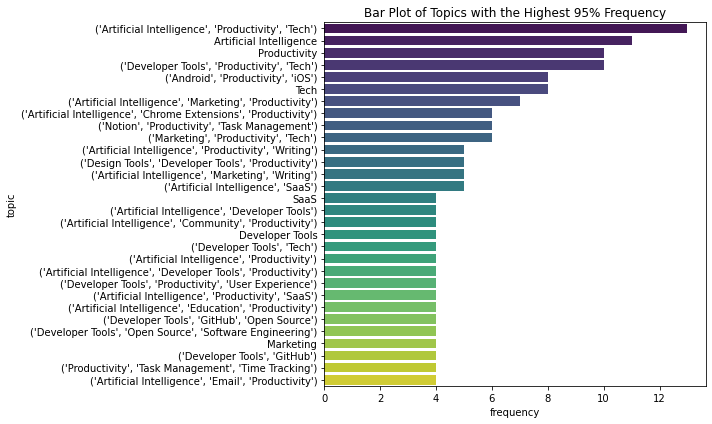

In [111]:

# Step 2: Sort the DataFrame by 'Frequency' in descending order
df_sorted = Topic_grq_frq_df.sort_values(by='frequency', ascending=False)

# Step 3: Calculate the threshold for the highest 50% of the data
threshold = df_sorted['frequency'].quantile(0.95)

# Step 4: Filter the DataFrame to keep only the rows with frequencies greater than the threshold
df_filtered = df_sorted[df_sorted['frequency'] > threshold]

# Step 5: Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='topic', data=df_filtered, palette='viridis', dodge=False) # Add dodge=False to increase bar spacing
plt.xlabel('frequency')
plt.ylabel('topic')
plt.title('Bar Plot of Topics with the Highest 95% Frequency')

# Rotate the y-axis labels for better readability
# plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Extracting the frequencies of individual topics 

In [112]:
# Split the topics column and create a list of all topics
all_topics = df['topics'].str.split(',').explode()
all_topics.tolist()

# Removing leading spaces from each string in the list
all_topics = [s.lstrip() for s in all_topics]
print("\nList of all topics (all_topics):")
print(all_topics)

# Assuming you have a list of items called 'items'
item_freq = pd.Series(all_topics).value_counts().reset_index()

# Rename the columns
item_freq.columns = ['topic', 'frequency']

# Display the DataFrame
print(item_freq)

item_freq.head()



List of all topics (all_topics):
['Search', 'Design Tools', 'Marketing', 'Tech', 'Productivity', 'Hiring', 'Artificial Intelligence', 'Productivity', 'Privacy', 'Crypto', 'Games', 'Web3', 'Android', 'iOS', 'E-Commerce', 'Productivity', 'Task Management', 'SaaS', 'Mac', 'Design Tools', 'Developer Tools', 'Newsletters', 'Marketing', 'E-Commerce', 'Android', 'iOS', 'News', 'Education', 'Tech', 'Side Project', 'Productivity', 'Open Source', 'GitHub', 'Productivity', 'User Experience', 'UX Design', 'Mac', 'Productivity', 'Developer Tools', 'Productivity', 'Marketing', 'Artificial Intelligence', 'Chrome Extensions', 'Productivity', 'Social Media', 'Productivity', 'Marketing', 'Developer Tools', 'Design Tools', 'Augmented Reality', '3D Modeling', 'Design Tools', 'Productivity', 'Sales', 'Messaging', 'Artificial Intelligence', 'Bots', 'Fintech', 'Investing', 'Android', 'Privacy', 'Security', 'Kids', 'Education', 'Books', 'Web App', 'Software Engineering', 'Developer Tools', 'News', 'Social Ne

,topic,frequency
0,Productivity,382
1,Artificial Intelligence,320
2,Tech,158
3,Developer Tools,157
4,Marketing,132


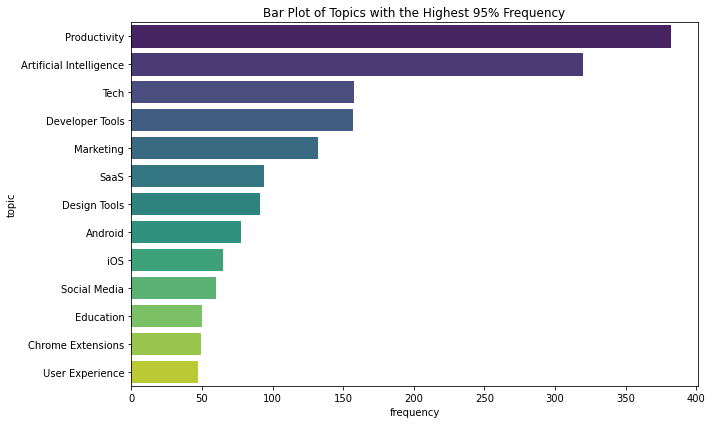

In [113]:

# Step 2: Sort the DataFrame by 'Frequency' in descending order
df_sorted = item_freq.sort_values(by='frequency', ascending=False)

# Step 3: Calculate the threshold for the highest 50% of the data
threshold = df_sorted['frequency'].quantile(0.95)

# Step 4: Filter the DataFrame to keep only the rows with frequencies greater than the threshold
df_filtered = df_sorted[df_sorted['frequency'] > threshold]

# Step 5: Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='topic', data=df_filtered, palette='viridis', dodge=False) # Add dodge=False to increase bar spacing
plt.xlabel('frequency')
plt.ylabel('topic')
plt.title('Bar Plot of Topics with the Highest 95% Frequency')

# Rotate the y-axis labels for better readability
# plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Daily Product Launches 

### Histogram 

    createdAt  product_count
0  2022-12-31             35
1  2023-01-01             24
2  2023-01-02             32
3  2023-01-03             30
4  2023-01-04             34


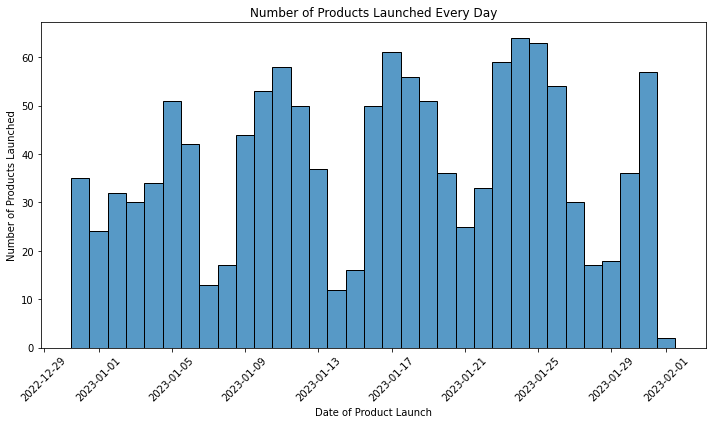

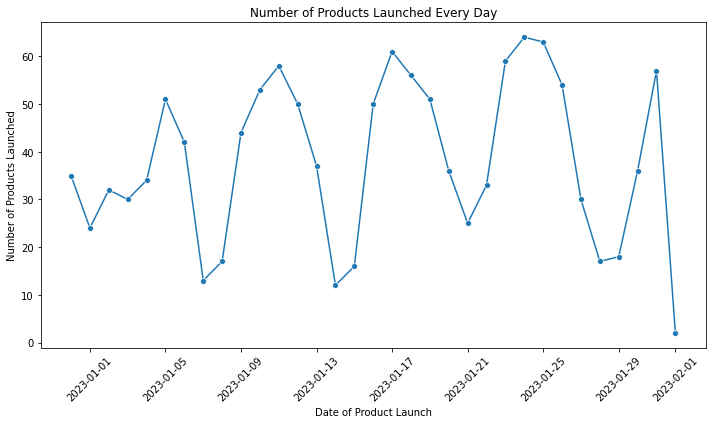

In [119]:
# Convert the 'createdAt' column to a proper datetime data type:
df['createdAt'] = pd.to_datetime(df['createdAt']).dt.date

# Group the data by the 'createdAt' date and count the number of products launched each day:
product_count_per_day = df.groupby('createdAt').size().reset_index(name='product_count')
print(product_count_per_day.head())


# Plot the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=product_count_per_day, x='createdAt', weights='product_count', bins=len(product_count_per_day['createdAt']), kde=False)
plt.xlabel('Date of Product Launch')
plt.ylabel('Number of Products Launched')
plt.title('Number of Products Launched Every Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=product_count_per_day, x='createdAt', y='product_count', marker='o')
plt.xlabel('Date of Product Launch')
plt.ylabel('Number of Products Launched')
plt.title('Number of Products Launched Every Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Line Plot

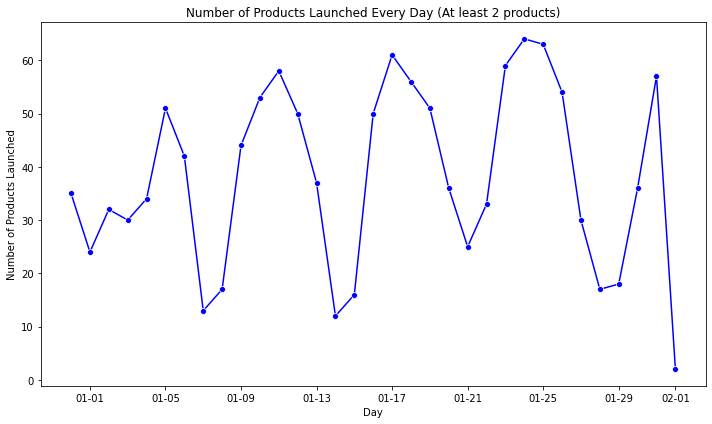

Number of days displayed: 33


In [115]:
# Count the number of products launched on each day
product_count_by_day = df['createdAt'].value_counts().sort_index()

# Filter days with two or more products launched
product_count_by_day = product_count_by_day[product_count_by_day >= 2]

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=product_count_by_day.index, y=product_count_by_day.values, marker='o', color='blue')
plt.xlabel('Day')
plt.ylabel('Number of Products Launched')
plt.title('Number of Products Launched Every Day (At least 2 products)')
plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.tight_layout()
plt.show()

# Print the number of days displayed in the line plot
print("Number of days displayed:", len(product_count_by_day))

## Weekly Product Launches 

In [116]:

# Resample the DataFrame by week and count the number of products launched each week
product_count_by_week = df.resample('W', on='createdAt')['id'].count()

# Create the count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=product_count_by_week.index, y=product_count_by_week.values, palette='viridis')
plt.xlabel('Week')
plt.ylabel('Number of Products Launched')
plt.title('Weekly Number of Products Launched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'